<a href="https://colab.research.google.com/github/hyunchangyi/python2021/blob/main/WIOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -r python2021/
!git clone https://github.com/hyunchangyi/python2021.git

rm: cannot remove 'python2021/': No such file or directory
Cloning into 'python2021'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 146 (delta 61), reused 29 (delta 3), pack-reused 0
Receiving objects: 100% (146/146), 35.16 MiB | 8.81 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [2]:
import pandas as pd
import numpy as np
from IPython.display import IFrame, Image

idx = pd.IndexSlice

# 국제투입산출표

### 중간투입행렬 Z, 최종수요행렬 F, 부가가치벡터 V, 총산출벡터 X
$
\begin{bmatrix}
\mathbf{Z} & \mathbf{F}\\
\mathbf{V}' &  \\
\mathbf{X}' &  
\end{bmatrix}
$
,

where
$
\mathbf{Z} = 
\begin{bmatrix}
Z_{c-m, c-m} & Z_{c-m, c-s} & Z_{c-m, k-m} & Z_{c-m, k-s}\\
Z_{c-s, c-m} & Z_{c-s, c-s} & Z_{c-s, k-m} & Z_{c-s, k-s}\\
Z_{k-m, c-m} & Z_{k-m, c-s} & Z_{k-m, k-m} & Z_{k-m, k-s}\\
Z_{k-s, c-m} & Z_{k-s, c-s} & Z_{k-s, k-m} & Z_{k-s, k-s}
\end{bmatrix}$
and
$\mathbf{F} = 
\begin{bmatrix}
F_{c-m, c-c} & F_{c-m, c-i} &F_{c-m, k-c} &F_{c-m, k-i}\\
F_{c-s, c-c} & F_{c-s, c-i} &F_{c-s, k-c} &F_{c-s, k-i}\\
F_{k-m, c-c} & F_{k-m, c-i} &F_{k-m, k-c} &F_{k-m, k-i}\\
F_{k-s, c-c} & F_{k-s, c-i} &F_{k-s, k-c} &F_{k-s, k-i}
\end{bmatrix}
$

### 레온티에프 역행렬: $(1-A)^{-1}$

$\mathbf{X} = \mathbf{A}\mathbf{X} + \mathbf{f}$ with $\mathbf{A}_{i,j} = \mathbf{Z}_{i,j}/\mathbf{X}_j$ and $\mathbf{f}_{i} = \sum_{j}\mathbf{F}_{i,j}$

$\mathbf{X} = (\mathbf{I} - \mathbf{A})^{-1}\mathbf{f}$

In [3]:
def Leon(A):
    return pd.DataFrame(np.linalg.inv(np.identity(A.shape[0]) - A),
                        index=A.index, columns=A.columns)

## 주피터노트북에서 수식 편집
- http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html

# WIOD

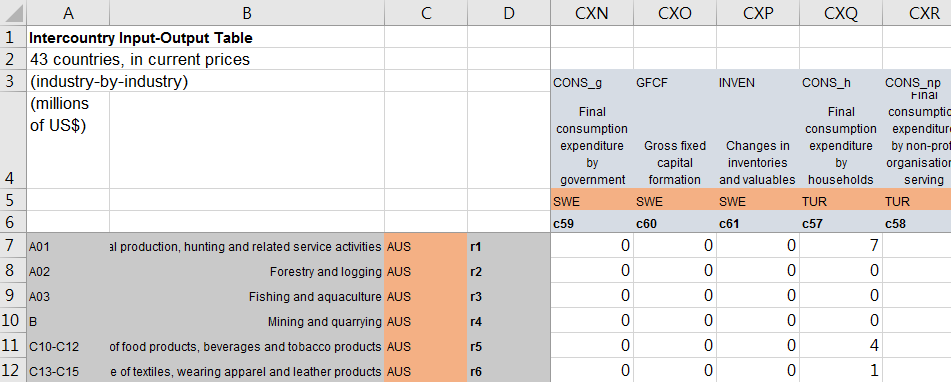

In [6]:
Image('python2021/input/wiot_download.PNG')

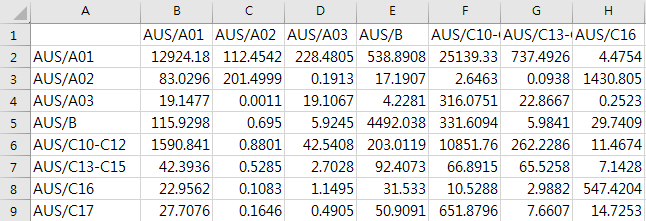

In [7]:
Image('python2021/input/wiot_csv.PNG')

In [8]:
df = pd.read_csv('python2021/input/WIOT2014_Nov16_ROW.csv', header=0, index_col=0)

In [9]:
df.head()

,AUS/A01,AUS/A02,AUS/A03,AUS/B,AUS/C10-C12,AUS/C13-C15,AUS/C16,AUS/C17,AUS/C18,AUS/C19,AUS/C20,AUS/C21,AUS/C22,AUS/C23,AUS/C24,AUS/C25,AUS/C26,AUS/C27,AUS/C28,AUS/C29,AUS/C30,AUS/C31_C32,AUS/C33,AUS/D35,AUS/E36,AUS/E37-E39,AUS/F,AUS/G45,AUS/G46,AUS/G47,AUS/H49,AUS/H50,AUS/H51,AUS/H52,AUS/H53,AUS/I,AUS/J58,AUS/J59_J60,AUS/J61,AUS/J62_J63,...,RUS/CONS_np,RUS/CONS_g,RUS/GFCF,RUS/INVEN,SVK/CONS_h,SVK/CONS_np,SVK/CONS_g,SVK/GFCF,SVK/INVEN,SVN/CONS_h,SVN/CONS_np,SVN/CONS_g,SVN/GFCF,SVN/INVEN,SWE/CONS_h,SWE/CONS_np,SWE/CONS_g,SWE/GFCF,SWE/INVEN,TUR/CONS_h,TUR/CONS_np,TUR/CONS_g,TUR/GFCF,TUR/INVEN,TWN/CONS_h,TWN/CONS_np,TWN/CONS_g,TWN/GFCF,TWN/INVEN,USA/CONS_h,USA/CONS_np,USA/CONS_g,USA/GFCF,USA/INVEN,ROW/CONS_h,ROW/CONS_np,ROW/CONS_g,ROW/GFCF,ROW/INVEN,TOT/GO
AUS/A01,12924.1797,112.4542,228.4805,538.8908,25139.3343,737.4926,4.4754,3.1305,1.8896,0.2268,86.7216,109.1476,147.2527,5.0543,8.1268,6.3418,0.3404,1.1245,2.3090,2.4935,2.5148,9.4517,0.0,14.3029,14.1849,0.4156,838.4008,5.7688,435.5278,1338.1366,50.2044,4.4885,6.6663,27.5398,4.5911,1257.1109,1.9858,36.9323,13.3234,18.0390,...,0.0,0.0279,0.0059,2.7954,0.0128,0.0000,0.0006,0.0002,0.0000,0.0270,0.0,0.0001,0.0001,0.0001,6.4962,0.0,0.0016,0.0065,0.0005,7.2520,0.0,0.0574,0.0147,0.0701,20.9742,0.2258,0.0302,0.3197,0.4210,57.2807,0.0,0.0000,0.3249,0.0274,723.1900,0.0004,14.1563,20.5207,0.0101,70292.0345
AUS/A02,83.0296,201.4999,0.1913,17.1907,2.6463,0.0938,1430.8049,0.3695,4.9346,0.2519,160.7720,29.6218,25.4617,1.0755,1.2345,0.9973,0.0816,0.1572,0.3354,0.6690,0.3725,0.2008,0.0,1.4242,0.2848,0.2772,15.9829,0.4087,7.4225,4.5145,5.7428,0.4459,3.2657,8.0902,0.8596,6.9360,0.3917,0.6428,1.0765,3.9571,...,0.0,0.0000,0.0003,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0,0.0000,0.0000,0.0000,0.0033,0.0,0.0000,0.0003,0.0000,0.0005,0.0,0.0000,0.0002,0.0000,0.0146,0.1631,0.0014,0.3935,0.0001,15.2906,0.0,0.0000,0.0150,0.0004,0.4234,0.0000,0.0001,0.0010,-0.0001,2585.3797
AUS/A03,19.1477,0.0011,19.1067,4.2281,316.0751,22.8667,0.2523,0.2685,0.2986,0.0363,0.1962,0.2389,0.2872,0.7808,0.8504,0.7285,0.0613,0.1163,0.2481,0.5036,0.2752,121.6553,0.0,1.1124,0.2214,0.2175,11.9743,0.3100,30.1184,419.3634,2.0595,0.3387,2.5347,6.2754,0.6194,246.8482,0.2946,0.4791,0.7271,3.0032,...,0.0,0.0000,0.0001,0.0021,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0022,0.0,0.0000,0.0001,0.0000,0.0002,0.0,0.0000,0.0001,0.0000,0.3833,0.0125,0.0005,0.0001,0.0000,0.3125,0.0,0.0000,0.0050,0.0083,404.0411,0.0004,0.0046,0.3580,0.0006,3175.0444
AUS/B,115.9298,0.6950,5.9245,4492.0377,331.6094,5.9841,29.7409,49.7640,21.3827,10759.5968,550.7472,24.5704,49.8022,611.3403,11722.1286,108.1427,4.9384,12.3183,24.6304,27.5032,26.5213,28.0928,0.0,998.3952,28.4858,3.2638,2469.2884,17.1922,1366.5650,163.8032,196.1245,17.7611,63.6312,151.8552,60.4623,191.8479,16.2057,20.9423,85.5166,82.9795,...,0.0,0.0004,0.0294,0.0067,0.0048,0.0001,0.0030,0.0008,0.0016,0.0111,0.0,0.0013,0.0005,0.0002,0.1593,0.0,0.1208,0.0307,0.0031,0.0568,0.0,0.0022,0.0221,0.0008,0.8129,0.0216,0.1512,0.0421,0.0132,11.3062,0.0,0.0002,1.6103,0.0470,14.8716,0.0067,0.5947,19.7268,-0.2821,171985.1223
AUS/C10-C12,1590.8406,0.8801,42.5408,203.0119,10851.7590,262.2286,11.4674,18.1406,10.9028,2.8975,243.4517,108.6162,27.6398,21.2474,33.2338,27.4826,5.7690,15.4050,24.8882,24.2211,27.3793,28.6812,0.0,22.5073,15.8382,7.9510,445.8115,50.3994,1205.2354,1535.1823,56.4539,4.8980,31.4418,23.0538,22.5206,11916.7736,4.2730,21.1507,19.8714,27.1023,...,0.0,0.0020,0.0254,0.0099,0.1261,0.0001,0.0026,0.0007,0.0001,1.2103,0.0,0.0006,0.0004,0.0008,19.1042,0.0,0.0204,0.0267,0.0031,3.8079,0.0,0.1272,0.0191,0.0007,376.3159,1.4184,0.1403,0.0377,0.0121,2197.9296,0.0,0.0002,1.3935,0.0413,4810.2350,0.0014,47.0167,1.3452,0.0279,83504.0366


리스트(국가, 산업, 최종수요항목, 유로지역, 삭제항목) 정의

In [10]:
countries = ['AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHE', 'CHN', 'CYP',
             'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC',
             'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'ITA', 'JPN', 'KOR', 'LTU',
             'LUX', 'LVA', 'MEX', 'MLT', 'NLD', 'NOR', 'POL', 'PRT', 'ROU',
             'RUS', 'SVK', 'SVN', 'SWE', 'TUR', 'TWN', 'USA', 'ROW']
sectors = ['A01', 'A02', 'A03', 'B', 'C10-C12', 'C13-C15', 'C16', 'C17', 'C18',
           'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27',
           'C28', 'C29', 'C30', 'C31_C32', 'C33', 'D35', 'E36', 'E37-E39', 'F',
           'G45', 'G46', 'G47', 'H49', 'H50', 'H51', 'H52', 'H53', 'I', 'J58',
           'J59_J60', 'J61', 'J62_J63', 'K64', 'K65', 'K66', 'L68', 'M69_M70',
           'M71', 'M72', 'M73', 'M74_M75', 'N', 'O84', 'P85', 'Q', 'R_S', 'T',
           'U']
fdemands = ['CONS_h', 'CONS_np', 'CONS_g', 'GFCF', 'INVEN']
EU = ['AUT', 'BEL', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN',
      'IRL', 'ITA', 'LUX', 'NLD', 'POL', 'PRT', 'SVK', 'SVN', 'ESP', 'SWE',
      'GBR', 'BGR', 'CYP', 'HRV', 'LTU', 'LVA', 'MLT', 'ROU']
del_sector = ['II_fob', 'TXSP', 'EXP_adj', 'PURR', 'PURNR', 'IntTTM']

In [11]:
len(countries)

44

In [12]:
len(sectors)

56

데이터프레임 행, 열을 멀티인덱스로 변환
- from_tuples()
- index.str.split('/').tolist()

In [13]:
df.index = pd.MultiIndex.from_tuples(df.index.str.split('/').tolist())
df.columns = pd.MultiIndex.from_tuples(df.columns.str.split('/').tolist())

In [15]:
df.tail()

AUS                        ...  ROW        TOT
                   A01        A02        A03  ... GFCF INVEN   GO
TOT PURR        0.0000     0.0000     0.0000  ...  0.0   0.0  0.0
    PURNR       0.0000     0.0000     0.0000  ...  0.0   0.0  0.0
    VA      30489.1902  1569.8989  1894.7385  ...  0.0   0.0  0.0
    IntTTM    261.6787    22.2167    23.8678  ...  0.0   0.0  0.0
    GO      70292.0345  2585.3797  3175.0444  ...  0.0   0.0  0.0

[5 rows x 2685 columns]

TOT의 하위항목중 VA, GO를 제외한 나머니 항목(del_sector) 제거
- df.drop(labels, axis=0, inplace=True)

In [16]:
df.drop([('TOT', l) for l in del_sector], axis=0, inplace=True)

In [17]:
df.tail()

AUS                        ...      ROW                     TOT
                A01        A02        A03  ...     GFCF      INVEN           GO
ROW R_S      2.1879     0.0112     0.1283  ...  11.4778  2171.8532  457353.4452
    T        0.0412     0.0000     0.0001  ...   0.0029   -73.4201   19919.4457
    U        0.0000     0.0000     0.0000  ...   0.0000     0.8744      32.0506
TOT VA   30489.1902  1569.8989  1894.7385  ...   0.0000     0.0000       0.0000
    GO   70292.0345  2585.3797  3175.0444  ...   0.0000     0.0000       0.0000

[5 rows x 2685 columns]

데이터프레임 둘러보기
- f-string 이용

In [19]:
df.applymap(lambda x: f'{x:,.2f}')

AUS                      ...    ROW                   TOT
                   A01       A02       A03  ...   GFCF     INVEN          GO
AUS A01      12,924.18    112.45    228.48  ...  20.52      0.01   70,292.03
    A02          83.03    201.50      0.19  ...   0.00     -0.00    2,585.38
    A03          19.15      0.00     19.11  ...   0.36      0.00    3,175.04
    B           115.93      0.69      5.92  ...  19.73     -0.28  171,985.12
    C10-C12   1,590.84      0.88     42.54  ...   1.35      0.03   83,504.04
...                ...       ...       ...  ...    ...       ...         ...
ROW R_S           2.19      0.01      0.13  ...  11.48  2,171.85  457,353.45
    T             0.04      0.00      0.00  ...   0.00    -73.42   19,919.45
    U             0.00      0.00      0.00  ...   0.00      0.87       32.05
TOT VA       30,489.19  1,569.90  1,894.74  ...   0.00      0.00        0.00
    GO       70,292.03  2,585.38  3,175.04  ...   0.00      0.00        0.00

[2466 rows x 2685 columns]

데이터프레임 표시 형식 변경
- pd.set_option()

In [20]:
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x) if abs(x) < 100 else '{:,.0f}'.format(x))

유로지역 국가들을 하나의 지역으로 통합
- 유로지역 국가이름을 'EU'로 대응시키는 딕셔너리 생성
- 딕셔너리를 이용하여 행과 열에 있는 유로지역 국가명을 'EU'로 변경
- 데이터프레임 값을 국가 이름 기준으로 다시 정리
    - 행과 열 각각에 대해 행과 열 라벨을 기준으로 값 더하기 groupby(df.columns)

In [22]:
dict(zip(EU, ['EU'] * len(EU)))

{'AUT': 'EU',
 'BEL': 'EU',
 'BGR': 'EU',
 'CYP': 'EU',
 'CZE': 'EU',
 'DEU': 'EU',
 'DNK': 'EU',
 'ESP': 'EU',
 'EST': 'EU',
 'FIN': 'EU',
 'FRA': 'EU',
 'GBR': 'EU',
 'GRC': 'EU',
 'HRV': 'EU',
 'HUN': 'EU',
 'IRL': 'EU',
 'ITA': 'EU',
 'LTU': 'EU',
 'LUX': 'EU',
 'LVA': 'EU',
 'MLT': 'EU',
 'NLD': 'EU',
 'POL': 'EU',
 'PRT': 'EU',
 'ROU': 'EU',
 'SVK': 'EU',
 'SVN': 'EU',
 'SWE': 'EU'}

In [23]:
df.rename(columns = dict(zip(EU, ['EU'] * len(EU))), level = 0, inplace = True)

In [24]:
df = df.rename(index = dict(zip(EU, ['EU'] * len(EU))), level = 0)

In [25]:
df = df.groupby(df.columns, axis=1, sort=False).sum()
df = df.groupby(df.index, axis=0, sort=False).sum()

In [26]:
df

,"(AUS, A01)","(AUS, A02)","(AUS, A03)","(AUS, B)","(AUS, C10-C12)","(AUS, C13-C15)","(AUS, C16)","(AUS, C17)","(AUS, C18)","(AUS, C19)","(AUS, C20)","(AUS, C21)","(AUS, C22)","(AUS, C23)","(AUS, C24)","(AUS, C25)","(AUS, C26)","(AUS, C27)","(AUS, C28)","(AUS, C29)","(AUS, C30)","(AUS, C31_C32)","(AUS, C33)","(AUS, D35)","(AUS, E36)","(AUS, E37-E39)","(AUS, F)","(AUS, G45)","(AUS, G46)","(AUS, G47)","(AUS, H49)","(AUS, H50)","(AUS, H51)","(AUS, H52)","(AUS, H53)","(AUS, I)","(AUS, J58)","(AUS, J59_J60)","(AUS, J61)","(AUS, J62_J63)",...,"(KOR, CONS_np)","(KOR, CONS_g)","(KOR, GFCF)","(KOR, INVEN)","(MEX, CONS_h)","(MEX, CONS_np)","(MEX, CONS_g)","(MEX, GFCF)","(MEX, INVEN)","(NOR, CONS_h)","(NOR, CONS_np)","(NOR, CONS_g)","(NOR, GFCF)","(NOR, INVEN)","(RUS, CONS_h)","(RUS, CONS_np)","(RUS, CONS_g)","(RUS, GFCF)","(RUS, INVEN)","(TUR, CONS_h)","(TUR, CONS_np)","(TUR, CONS_g)","(TUR, GFCF)","(TUR, INVEN)","(TWN, CONS_h)","(TWN, CONS_np)","(TWN, CONS_g)","(TWN, GFCF)","(TWN, INVEN)","(USA, CONS_h)","(USA, CONS_np)","(USA, CONS_g)","(USA, GFCF)","(USA, INVEN)","(ROW, CONS_h)","(ROW, CONS_np)","(ROW, CONS_g)","(ROW, GFCF)","(ROW, INVEN)","(TOT, GO)"
"(AUS, A01)","12,924",112,228,539,"25,139",737,4.48,3.13,1.89,0.23,86.72,109,147,5.05,8.13,6.34,0.34,1.12,2.31,2.49,2.51,9.45,0.00,14.30,14.18,0.42,838,5.77,436,"1,338",50.20,4.49,6.67,27.54,4.59,"1,257",1.99,36.93,13.32,18.04,...,0.00,0.00,0.12,0.07,1.18,0.00,0.00,0.02,0.00,4.68,0.00,0.00,0.01,0.00,2.65,0.00,0.03,0.01,2.80,7.25,0.00,0.06,0.01,0.07,20.97,0.23,0.03,0.32,0.42,57.28,0.00,0.00,0.32,0.03,723,0.00,14.16,20.52,0.01,"70,292"
"(AUS, A02)",83.03,201,0.19,17.19,2.65,0.09,"1,431",0.37,4.93,0.25,161,29.62,25.46,1.08,1.23,1.00,0.08,0.16,0.34,0.67,0.37,0.20,0.00,1.42,0.28,0.28,15.98,0.41,7.42,4.51,5.74,0.45,3.27,8.09,0.86,6.94,0.39,0.64,1.08,3.96,...,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.16,0.00,0.39,0.00,15.29,0.00,0.00,0.01,0.00,0.42,0.00,0.00,0.00,-0.00,"2,585"
"(AUS, A03)",19.15,0.00,19.11,4.23,316,22.87,0.25,0.27,0.30,0.04,0.20,0.24,0.29,0.78,0.85,0.73,0.06,0.12,0.25,0.50,0.28,122,0.00,1.11,0.22,0.22,11.97,0.31,30.12,419,2.06,0.34,2.53,6.28,0.62,247,0.29,0.48,0.73,3.00,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.38,0.01,0.00,0.00,0.00,0.31,0.00,0.00,0.01,0.01,404,0.00,0.00,0.36,0.00,"3,175"
"(AUS, B)",116,0.69,5.92,"4,492",332,5.98,29.74,49.76,21.38,"10,760",551,24.57,49.80,611,"11,722",108,4.94,12.32,24.63,27.50,26.52,28.09,0.00,998,28.49,3.26,"2,469",17.19,"1,367",164,196,17.76,63.63,152,60.46,192,16.21,20.94,85.52,82.98,...,0.00,0.00,0.25,0.01,0.10,0.00,0.00,0.09,0.01,0.11,0.00,0.01,0.05,0.03,0.25,0.00,0.00,0.03,0.01,0.06,0.00,0.00,0.02,0.00,0.81,0.02,0.15,0.04,0.01,11.31,0.00,0.00,1.61,0.05,14.87,0.01,0.59,19.73,-0.28,"171,985"
"(AUS, C10-C12)","1,591",0.88,42.54,203,"10,852",262,11.47,18.14,10.90,2.90,243,109,27.64,21.25,33.23,27.48,5.77,15.40,24.89,24.22,27.38,28.68,0.00,22.51,15.84,7.95,446,50.40,"1,205","1,535",56.45,4.90,31.44,23.05,22.52,"11,917",4.27,21.15,19.87,27.10,...,0.00,0.00,0.21,0.01,40.69,0.00,0.00,0.08,0.01,7.68,0.00,0.01,0.02,0.01,92.84,0.00,0.00,0.03,0.01,3.81,0.00,0.13,0.02,0.00,376,1.42,0.14,0.04,0.01,"2,198",0.00,0.00,1.39,0.04,"4,810",0.00,47.02,1.35,0.03,"83,504"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(ROW, R_S)",2.19,0.01,0.13,12.71,5.15,0.30,0.21,0.70,0.59,0.11,1.03,0.76,0.35,1.20,1.03,1.66,0.15,0.30,0.46,0.74,0.70,0.28,0.00,1.21,0.39,0.24,22.37,0.34,9.59,12.26,10.84,0.63,1.50,3.73,0.96,4.75,0.99,5.76,1.95,2.02,...,0.00,82.27,7.16,0.01,3.93,0.00,0.00,0.31,0.07,24.27,2.35,2.97,0.19,0.29,10.03,0.02,0

국가명 리스트에서 유로지역 국가들을 제거하고, EU 추가

In [27]:
countries = [item for item in countries if item not in EU]
countries = countries + ['EU']

In [28]:
len(countries)

17

투입산출표 행, 열 라벨이 tuple형식으로 바뀌었으므로, 멀티인덱스로 다시 변환

In [29]:
df.index = pd.MultiIndex.from_tuples(df.index)
df.columns = pd.MultiIndex.from_tuples(df.columns)

In [30]:
df

AUS                      ...    ROW                  TOT
               A01   A02   A03       B  ... CONS_g  GFCF  INVEN      GO
AUS A01     12,924   112   228     539  ...  14.16 20.52   0.01  70,292
    A02      83.03   201  0.19   17.19  ...   0.00  0.00  -0.00   2,585
    A03      19.15  0.00 19.11    4.23  ...   0.00  0.36   0.00   3,175
    B          116  0.69  5.92   4,492  ...   0.59 19.73  -0.28 171,985
    C10-C12  1,591  0.88 42.54     203  ...  47.02  1.35   0.03  83,504
...            ...   ...   ...     ...  ...    ...   ...    ...     ...
ROW R_S       2.19  0.01  0.13   12.71  ... 27,315 11.48  2,172 457,353
    T         0.04  0.00  0.00    1.91  ...   0.07  0.00 -73.42  19,919
    U         0.00  0.00  0.00    0.00  ...  30.46  0.00   0.87   32.05
TOT VA      30,489 1,570 1,895  98,315  ...   0.00  0.00   0.00    0.00
    GO      70,292 2,585 3,175 171,985  ...   0.00  0.00   0.00    0.00

[954 rows x 1038 columns]

In [33]:
print(*countries)

AUS BRA CAN CHE CHN IDN IND JPN KOR MEX NOR RUS TUR TWN USA ROW EU


In [34]:
df.sort_index(ascending=True, inplace=True, axis=0)
df.sort_index(ascending=True, inplace=True, axis=1)

In [35]:
df

AUS                           ...   USA                         
               A01  A02   A03     B C10-C12  ...   P85      Q    R_S     T    U
AUS A01     12,924  112   228   539  25,139  ...  0.12   0.25   0.12  0.00 0.00
    A02      83.03  201  0.19 17.19    2.65  ...  0.02   0.12   0.05  0.00 0.00
    A03      19.15 0.00 19.11  4.23     316  ...  0.02   0.10   0.04  0.00 0.00
    B          116 0.69  5.92 4,492     332  ...  0.13   1.16   0.58  0.01 0.00
    C10-C12  1,591 0.88 42.54   203  10,852  ...  8.29  16.37   4.27  0.03 0.00
...            ...  ...   ...   ...     ...  ...   ...    ...    ...   ...  ...
USA P85       0.38 0.00  0.01  4.65    1.24  ... 2,330  1,925  3,204 70.50 0.00
    Q         0.09 0.00  0.01  0.24    0.24  ...   108 22,106    366  8.18 0.00
    R_S       0.08 0.00  0.00  0.30    0.08  ... 2,802 21,852 19,390   176 0.00
    T         0.00 0.00  0.00  0.00    0.00  ... 82.20    860    227  6.09 0.00
    U         0.00 0.00  0.00  0.00    0.00  ...  0.00   0.00   0.00  0.00 0.00

[954 rows x 1038 columns]

# 중국-제조업 소비 증가의 파급영향

$(\mathbf{I} - \mathbf{A})^{-1}\begin{bmatrix} 1\\ 0\\ 0\\ 0 \end{bmatrix}$

전체 투입산출표를 중간투입행렬, 최종수요행렬, 부가가치백터, 총산출벡터 등으로 나누어 정의
- 총산출이 0이면 계산시 오류가 발생하므로 총산출 벡터 P에서 0값을 아주 작은 값 10e-7로 대체

In [39]:
Z = df.loc[countries, (countries, sectors)]
F = df.loc[countries, (countries, fdemands)]
# VA = df.loc['TOT', (countries, sectors)].loc[['VA'], :]
VA = df.loc[idx['TOT', ['VA']], (countries, sectors)]
# P = df.loc['TOT', (countries, sectors)].loc[['GO'], :]
P = df.loc[idx['TOT', ['GO']], (countries, sectors)]
P[P <= 0] = 10e-7

Z, V를 국가-산업별 총산출(P)로 나누어 A, v 계산

- 판다스에서 데이터프레임 연산은 행, 열이름이 일치해야하므로 P.squeeze()으로 P에서 행이름을 제거
- 열 이름(axis = 1)을 기준으로 Z, V의 각 항목을 P의 각 항목으로 나누어줌

In [40]:
VA

AUS                             ...      EU                              
          A01   A02   A03      B C10-C12  ...     P85         Q     R_S      T    U
TOT VA 30,489 1,570 1,895 98,315  24,247  ... 877,287 1,226,105 528,740 69,503 0.00

[1 rows x 952 columns]

In [41]:

P

AUS                      ...        EU                    
          A01   A02   A03       B  ...         Q     R_S      T    U
TOT GO 70,292 2,585 3,175 171,985  ... 1,905,828 897,302 69,535 0.00

[1 rows x 952 columns]

In [42]:
v = VA.div(P.squeeze(), axis=1)
A = Z.div(P.squeeze(), axis=1)

In [43]:
B = Leon(A)

In [44]:
# NOTE: v = i'*(1-A). see Stehrer (2012),
# 'Trade in Value Added and the Value Added in Trade'

In [45]:
V = pd.DataFrame(np.diag(v.values[0]), index=A.index, columns=A.columns)

# 국가-산업별 수출

In [47]:
# %-----------------------------------------------------------------------%
# % export
# %-----------------------------------------------------------------------%
EX = pd.DataFrame()
for l in countries:
    _l = [item for item in countries if item not in [l]]
    E = Z.loc[l, _l].sum(axis=1) + F.loc[l, _l].sum(axis=1)
    E.name = l
    EX = EX.append(E.T)

# 수입의존도 Import content(intensity)

## direct import

$\mathbf{F} = 
\begin{bmatrix}
F_{c-m, k-c} &F_{c-m, k-i}\\
F_{c-s, k-c} &F_{c-s, k-i}
\end{bmatrix}
$

## indirect import

$\mathbf{A}_{c,k}(\mathbf{I}-\mathbf{A}_k)^{-1}\mathbf{F}_k \\
=\begin{bmatrix} A_{c-m, k-c} & A_{c-m, k-i}\\ A_{c-s, k-c} & A_{c-s, k-i} \end{bmatrix}
\left(I - \begin{bmatrix} A_{k-m, k-m} & A_{k-m, k-s}\\ A_{k-s, k-m} & A_{k-s, k-s} \end{bmatrix}\right)^{-1}
\begin{bmatrix}
F_{k-m, k-c} &F_{k-m, k-i}\\
F_{k-s, k-c} &F_{k-s, k-i}
\end{bmatrix}
$

In [48]:
# %-----------------------------------------------------------------------%
# % direct imports: Md (Mdir in M-file)
# % direct import for export is 0
# %-----------------------------------------------------------------------%
Md = pd.DataFrame()
for l in countries:
    M = F[l].groupby(axis=0, level=1).sum() - F.loc[l, l]
    M.index = pd.MultiIndex.from_arrays([[l] * len(M.index), M.index])
    Md = Md.append(M)
Md['EX'] = 0.0
# Md["TOTAL"] = Md.sum(axis=1)

In [49]:
# %-----------------------------------------------------------------------%
# % indirect imports: Mi (Mind in M-file)
# %-----------------------------------------------------------------------%
Mi = pd.DataFrame()
for l in countries:
    FE = F.loc[l, l]
    FE['EX'] = EX.loc[l, :]
    M = A[l].groupby(axis=0, level=1).sum() - A.loc[l, l]
    M = M.dot(Leon(A.loc[l, l]).dot(FE))
    M.index = pd.MultiIndex.from_arrays([[l] * len(M.index), M.index])
    Mi = Mi.append(M)

# TiVA: Trade in Value Added

$\mathbf{V}(\mathbf{I}-\mathbf{A})^{-1}F$

In [50]:
TiVA = V.dot(B).dot(F.groupby(level=0, axis=1).sum())
TiVA = TiVA.groupby(level=0, axis=0).sum()

# Value Added in Gross Export

$\mathbf{V}(\mathbf{I}-\mathbf{A})^{-1}\begin{bmatrix} X_{c} & \mathbf{0}\\ \mathbf{0} & X_{k} \end{bmatrix}$

In [51]:
# %-----------------------------------------------------------------------%
# Value share of countries (row) in each country's gross export (col)
# 1. calculate VAS, 2. divide VAS by gross export
# %-----------------------------------------------------------------------%
EX_stacked = EX.stack()
X = pd.DataFrame(np.diag(EX_stacked), index=EX_stacked.index,
                 columns=EX_stacked.index)
X = X.groupby(level=0, axis=1).sum()

vas = V.dot(B.dot(X))
vas = vas.groupby(axis=0, level=0).sum()

In [52]:
vas

,AUS,BRA,CAN,CHE,CHN,EU,IDN,IND,JPN,KOR,MEX,NOR,ROW,RUS,TUR,TWN,USA
AUS,"240,860",393,663,468,"17,179","4,248","1,247","2,072","11,906","8,778",658,137,"24,468",194,705,"7,472","1,987"
BRA,312,"208,497","1,401",347,"8,193","7,775",666,"1,584","2,281","2,284","1,365",603,"22,327",213,774,"1,541","3,929"
CAN,420,490,"421,837",638,"4,388","9,229",370,669,"2,653","2,859","3,368","1,109","21,222",257,519,"1,628","37,018"
CHE,320,240,798,"253,903","2,602","18,150",186,521,"1,157","1,302",613,326,"17,756",608,565,783,"2,177"
CHN,"4,739","3,215","9,837","3,113","2,003,597","54,361","6,045","6,563","25,906","39,281","14,266","1,172","174,357","4,347","5,820","23,338","25,061"
EU,"5,673","6,363","16,979","53,214","47,879","2,739,939","3,497","8,184","17,700","26,409","13,910","17,758","252,780","16,062","24,250","13,264","44,460"
IDN,"1,251",400,556,188,"5,614","3,980","171,696","1,680","6,129","5,296",615,85.99,"22,031",184,889,"4,918","1,758"
IND,439,629,792,561,"4,035","7,906",837,"269,981","1,454","2,184","1,007",166,"27,509",344,"1,702","1,347","3,050"
JPN,"1,326",721,"3,705","1,101","26,721","14,231","2,358","1,496","610,829","20,171","5,863",408,"50,128","1,038","1,165","17,973","11,089"
KOR,913,783,"1,708",443,"31,232","9,907","1,854","1,609","7,546","421,203","4,916",244,"34,968","1,506","2,049","8,615","6,673"


In [53]:
vas.loc['CHN', 'KOR']

39280.82758847543